Chapter 25

# 谱聚类
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

## 生成数据

In [2]:
np.random.seed(0)

n_samples = 500;
# 样本数据的数量

dataset = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
# 生成环形数据

X, y = dataset
# X 特征数据，y 标签数据

In [3]:
X = StandardScaler().fit_transform(X)
# 标准化数据集

In [5]:
X

array([[-1.18733642e+00,  1.36761133e+00],
       [ 7.13381205e-01,  1.11090331e-01],
       [ 6.47881253e-01,  6.67368004e-01],
       [ 1.39348457e-01, -8.57369836e-01],
       [ 5.31352159e-01, -9.77393590e-01],
       [ 1.82919602e+00,  6.93006262e-01],
       [-1.35982747e-01,  8.54252512e-01],
       [ 9.00336936e-01, -2.47098701e-01],
       [-1.34909086e+00, -1.14965553e+00],
       [-1.36662173e+00, -1.05211750e+00],
       [ 1.67319511e+00, -2.56272028e-01],
       [ 9.15672696e-01,  5.93268565e-02],
       [-9.20198983e-01, -2.13788249e-01],
       [ 5.57228856e-01,  8.57572043e-01],
       [-7.72754976e-01, -1.66106295e+00],
       [-1.53267627e-01,  7.23148953e-01],
       [ 6.05463941e-01, -5.32777109e-01],
       [-7.70897294e-01,  4.84365776e-01],
       [-1.36296243e+00, -1.14341491e+00],
       [ 9.48175582e-01,  1.57444925e+00],
       [ 7.47571606e-01, -1.66025297e+00],
       [-8.07699856e-01,  1.63389592e-01],
       [ 1.60546395e+00, -5.55336025e-01],
       [-1.

## 聚类

In [20]:
spectral = cluster.SpectralClustering(
    n_neighbors = 20,
    assign_labels='discretize',
    eigen_solver="arpack",
    affinity="nearest_neighbors",
    n_clusters=2)
# 使用SpectralClustering算法对数据进行聚类

y_pred = spectral.fit_predict(X)
# 返回每个样本的聚类标签

C:\Users\james\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


## 可视化

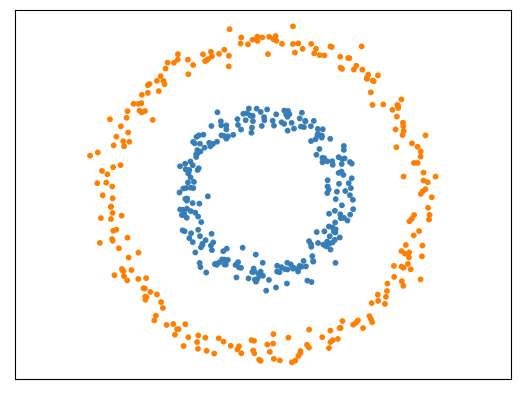

In [21]:
fig, ax = plt.subplots()

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))

plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.axis('equal')

plt.show()